# 1 Data preperation and descriptive statistics

Imorting the dataset and packages that will be used

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [25]:
f=pd.read_csv("listings_CPH.csv")

In [30]:
au=f.dropna(axis='columns')   #drop all NaN values across the columns
au

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,6983,Copenhagen 'N Livin',16774,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,1,0,4
1,26057,Lovely house - most attractive area,109777,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,1,303,8
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,3,56,7
3,29118,Best Location in Cool Istedgade,125230,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,1,59,2
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13810,653494030951422457,Top-floor Villa Apartment in the Heart of Hell...,465189427,sterbro,55.732840,12.572370,Entire home/apt,1250,14,0,1,0,0
13811,647809303952891559,Dejligt lille hus med flere hyggekroge ude og ...,4862421,Valby,55.667782,12.463285,Entire home/apt,450,3,3,1,0,3
13812,650819220455514228,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,134647873,Valby,55.659536,12.474726,Entire home/apt,400,1,3,1,0,3
13813,658612163688161695,Cosy apartment with a great view in Copenhagen,256903668,Brnshj-Husum,55.730971,12.487993,Entire home/apt,850,1,0,1,0,0


In [31]:
# selecting booking id as the index of the dataset
f = f.set_index('id')
f = f.sort_index()

# 1.1 Columns with review values

The selected columns are containing review values, describing amount, monthly occurence, and date of the reviews. The rows with NaN values will be dropped, as it is known that they won't provide any information regarding the review status, and will not be taken into consideration. The aim is to sort the data in a way, that it contains only the properties with a feedback (review), and with the most recent reviews (<1 year), which are not outdated.

In [6]:
f=f.dropna(subset=['number_of_reviews','last_review','reviews_per_month','number_of_reviews_ltm'])

In [7]:
f.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


To have a better overview of the columns containing review values, they will be merged into a new dataframe 'data_merge'. 

In [9]:
data1=f[f.select_dtypes(include=['float64','int64','object']).columns].iloc[:,11:14]  #index range of wanted columns
data2=f[f.select_dtypes(include=['float64','int64','object']).columns].iloc[:,16:17]  #index range of wanted columns
data_merge=pd.merge(data1,data2, on=f['id'])    #merge review columns with dependence on id

In [11]:
data_merge

,key_0,number_of_reviews,last_review,reviews_per_month,number_of_reviews_ltm
0,6983,172,2022-06-21,1.08,4
1,26057,59,2022-08-09,0.55,8
2,26473,300,2022-09-10,2.06,7
3,29118,24,2022-08-04,0.16,2
4,31094,19,2022-08-22,0.13,2
...,...,...,...,...,...
12165,646726550705810749,4,2022-08-28,1.85,4
12166,646941499450912133,4,2022-09-04,1.64,4
12167,647809303952891559,3,2022-07-21,1.01,3
12168,650819220455514228,3,2022-08-14,1.27,3


Rows containing 0 reviews, and on top of that, having no reviews in last 12 months ('number_of_reviews_ltm') are dropped.

In [12]:
data_merge1=data_merge[data_merge!=0].dropna()   #drop rows containing 0
data_merge1

,key_0,number_of_reviews,last_review,reviews_per_month,number_of_reviews_ltm
0,6983,172,2022-06-21,1.08,4.0
1,26057,59,2022-08-09,0.55,8.0
2,26473,300,2022-09-10,2.06,7.0
3,29118,24,2022-08-04,0.16,2.0
4,31094,19,2022-08-22,0.13,2.0
...,...,...,...,...,...
12165,646726550705810749,4,2022-08-28,1.85,4.0
12166,646941499450912133,4,2022-09-04,1.64,4.0
12167,647809303952891559,3,2022-07-21,1.01,3.0
12168,650819220455514228,3,2022-08-14,1.27,3.0


In total, removal of rows with no reviews resulted in discarding 2253 insignificant rows.

In [13]:
# check the number of rows before removing the ones without reviews
count_before=data_merge['number_of_reviews_ltm'].count()
print("Total number of rows with or without reviews:", count_before)
# check the number of rows after removing the ones without reviews
count_after=data_merge1['number_of_reviews_ltm'].count()
print("Number of rows with at least 1 review:",count_after)
print("Rows with no reviews:",count_before-count_after)

Total number of rows with or without reviews: 12170
Number of rows with at least 1 review: 9917
Rows with no reviews: 2253


The next step is to visualize the relevant columns with  review values, for the outliers detection, and further investigation.

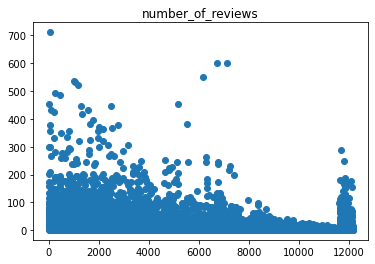

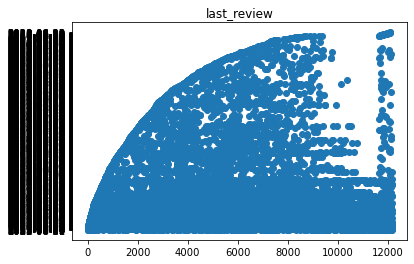

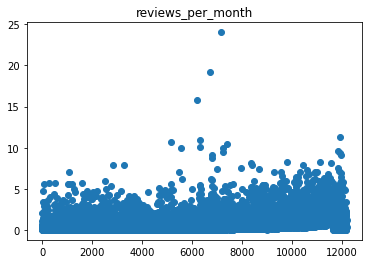

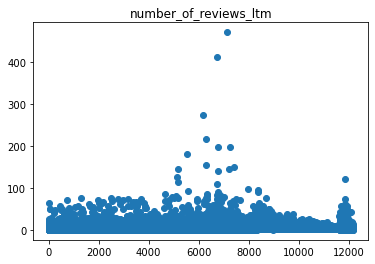

In [18]:
data_merge_col=['number_of_reviews', 'last_review', 'reviews_per_month',
       'number_of_reviews_ltm']
for i in range(len(data_merge_col)):
    plt.scatter(range(0,len(f[data_merge_col[i]])),f[data_merge_col[i]])
    plt.title(data_merge_col[i])
    plt.show()

The most relevant scatter plot for the review data, from the ones above, is the one describing the number of reviews, as seen below.

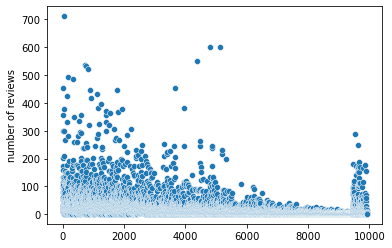

In [15]:
import seaborn as sb

sb.scatterplot(x=range(len(data_merge1)),y=data_merge1['number_of_reviews'])
plt.ylabel("number of reviews")
plt.show()

In this case, outliers will be considered the points with value bigger than 500. 

In [19]:
f.loc[f["number_of_reviews"] > 500]   #display only the rows with more than 500 reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
57,330915,Lovely room - in the heart of CPH!,799887,Bente,NaN,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,404,1,711,2022-09-06,5.55,3,31,49,NaN
1065,4282001,Welcome to Sundbyvestervarehus B&B,20733123,Britt,NaN,Amager Vest,55.65204,12.60875,Private room,500,1,536,2022-09-06,5.56,1,172,14,NaN
1102,4446663,værelse til leje,22317683,Pia,NaN,Vesterbro-Kongens Enghave,55.66851,12.55689,Private room,425,1,533,2022-09-13,5.57,3,266,29,NaN
1228,5214777,Christianshavn room with balcony,25705162,Jesper,NaN,Indre By,55.67055,12.58627,Private room,584,2,520,2022-09-04,5.60,1,58,57,NaN
6476,38542262,Copenhagens coolest hostel concept!,293981283,Urban Camper,NaN,Bispebjerg,55.70322,12.53800,Shared room,198,1,550,2022-09-09,15.74,1,364,275,NaN
7099,42501574,Aperon Apartment Hotel | 24/7 service | Prime ...,331283054,Aperon,NaN,Indre By,55.68213,12.57523,Entire home/apt,1529,1,602,2022-09-22,19.23,6,364,411,NaN
7570,44470634,"CityHub Copenhagen, Hub!",350780407,CityHost,NaN,Vesterbro-Kongens Enghave,55.67167,12.54656,Private room,721,1,599,2022-09-07,24.02,3,362,471,NaN


It is visible from the plot above that all the stayings considered as an outliers were of very short duration. Because of that, much more customers went through the property, and therefore amount of provided reviews was high, whereas it is most likely that properites which "raised the bar" on a minimum stay cannot rely much on a customer feedback.

# 1.2 Columns with price values

In [3]:
f.T

,0,1,2,3,4,5,6,7,8,9,...,13805,13806,13807,13808,13809,13810,13811,13812,13813,13814
id,6983,26057,26473,29118,31094,32379,32841,33680,37159,38499,...,638839422729041798,630779770351807878,632474141549608786,646726550705810749,646941499450912133,653494030951422457,647809303952891559,650819220455514228,658612163688161695,648436253362373119
name,Copenhagen 'N Livin',Lovely house - most attractive area,City Centre Townhouse Sleeps 1-10 persons,Best Location in Cool Istedgade,"Beautiful, spacious, central, renovated Penthouse","165 m2 artist flat on Vesterbro, with 2 bathr...",Cozy flat for Adults/Quiet for kids,Best location on Vesterbro/Cph,Unique space on greatest location,0 min. from everything in Cph.,...,"T31B, 1. A 1 bedroom apartment in Rødovre",Skøn lejlighed i Hvidovre,3 Room apartment. 8 min walk from CPH Airport,Ny rummelig lejlighed med tilhørende kat.,Big beautiful and charming apartment,Top-floor Villa Apartment in the Heart of Hell...,Dejligt lille hus med flere hyggekroge ude og ...,Lejlighed i Storkøbenhavn. 13 minutter fra cen...,Cosy apartment with a great view in Copenhagen,Big Bedroom connected with a large living room
host_id,16774,109777,112210,125230,129976,140105,142143,145671,160390,122489,...,424093643,60240725,76731355,54229471,141288846,465189427,4862421,134647873,256903668,141288846
host_name,Simon,Kari,Julia,Nana,Ebbe,Lise,Anders & Maria,Mette,Jeanette,Christina,...,Seneca,Henrik,Jørgen,Morten,Tanja,Martine,Kathrine,Tim,Sam,Tanja
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,Nrrebro,Indre By,Indre By,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,Vesterbro-Kongens Enghave,sterbro,Vesterbro-Kongens Enghave,Indre By,Indre By,...,Vanlse,Valby,Amager st,Brnshj-Husum,Bispebjerg,sterbro,Valby,Valby,Brnshj-Husum,Bispebjerg
latitude,55.68641,55.69307,55.67602,55.67023,55.666602,55.672638,55.71176,55.66631,55.68547,55.684288,...,55.67286,55.6387,55.6309,55.739028,55.730481,55.73284,55.667782,55.659536,55.730971,55.73142
longitude,12.54741,12.57649,12.5754,12.55504,12.555283,12.552493,12.57091,12.54555,12.56543,12.573019,...,12.4561,12.49824,12.64248,12.487433,12.521243,12.57237,12.463285,12.474726,12.487993,12.52177
room_type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,...,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Private room
price,898,2600,3250,725,1954,1280,617,1000,2916,1900,...,490,1000,845,856,1050,1250,450,400,850,420


In [4]:
price_median = np.median(f["price"])
print(price_median)

995.0


Graphs

<AxesSubplot:xlabel='neighbourhood'>

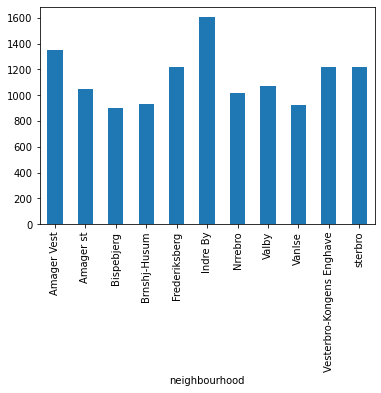

In [12]:
f.groupby("neighbourhood")["price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='neighbourhood'>

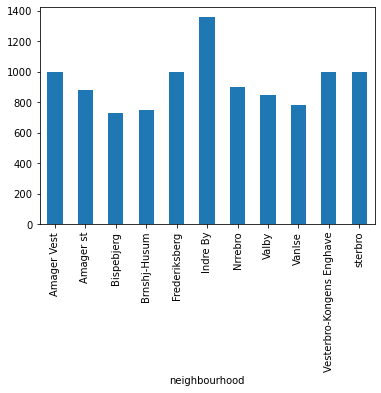

In [13]:
dataset.groupby("neighbourhood")["price"].median().plot(kind="bar")

<AxesSubplot:xlabel='room_type'>

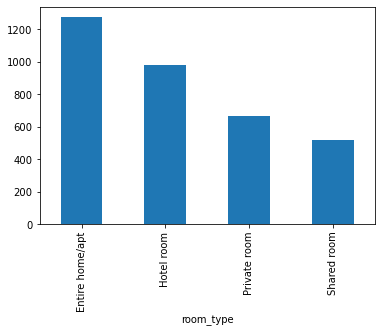

In [14]:
f.groupby("room_type")["price"].mean().plot(kind="bar")

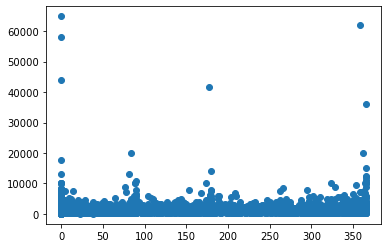

In [5]:
plt.scatter(f.availability_365,f.price)

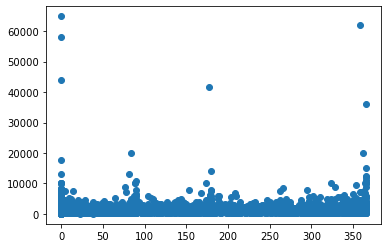

In [6]:
plt.scatter(f.availability_365,f.price)

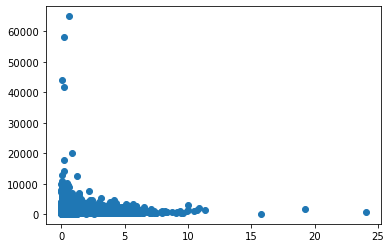

In [7]:
plt.scatter(f.reviews_per_month,f.price)

So we have 6 outliers that have way higher price than the rest. Lest try to take them out and plot these same 3 graphs again

In [8]:
dataset = f[f["price"]<30000]

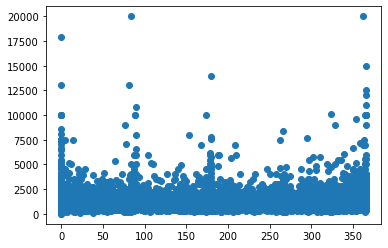

In [9]:
plt.scatter(dataset.availability_365,dataset.price)

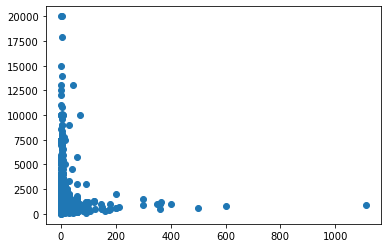

In [10]:
plt.scatter(dataset.minimum_nights,dataset.price)

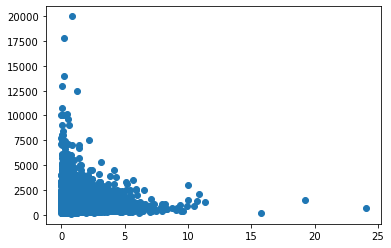

In [11]:
plt.scatter(dataset.reviews_per_month,dataset.price)

# 1.3 Columns with location values

# 1.4